In [1]:
import pandas as pd
import numpy as np
!pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt

You should consider upgrading via the 'C:\Users\sujay\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
df1 = pd.read_excel(r'final_table.xlsx')

In [6]:
df1 = df1.fillna('Not Available')

In [7]:
df1 = df1.set_index(['name','latitude','longitude'])

In [8]:
df1.head()

,,,Bar,Italian,Japanese,American,Steakhouse,Cafe,Indian,Asian,Healthy,German,Central European,Mediterranean,European,Vegan Options,Gluten Free Options,Seafood,rating_category,top1
name,latitude,longitude,,,,,,,,,,,,,,,,,,
Watzke Brauereiausschank am Goldenen Reiter,51.058426,13.741177,Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Available,Available,Not Available,Available,Not Available,Not Available,Not Available,C,Not Top 1%
Curry 24,51.051010,13.734768,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,C,Not Top 1%
Wenzel Dresden-Konigstrasse,51.061176,13.740208,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Available,Available,Not Available,Available,Not Available,Not Available,Not Available,C,Not Top 1%
Camondas Schokoladenkontor an der Frauenkirche,51.051495,13.741303,Not Available,Not Available,Not Available,Not Available,Not Available,Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,B,Not Top 1%
Restaurant Zur Waldpforte,49.525677,8.511316,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Available,Available,Not Available,Available,Not Available,Not Available,Not Available,B,Top 1%


__Elbow curve to find optimal K value for K-Mode clustering__

https://www.analyticsvidhya.com/blog/2021/06/kmodes-clustering-algorithm-for-categorical-data/

Cost is the sum of all the dissimilarities between the clusters.

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 3561.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 3561.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 3561.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 3561.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 3561.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 11, cost: 2795.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 242, cost: 2873.0
Run 2, iteration: 2/100, moves: 85, cost: 2810.0
Run 2, iteration: 3/100, moves

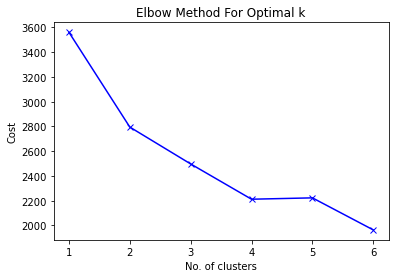

In [16]:
# Elbow curve to find optimal K
cost = []
K = range(1,7)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df1)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

We can see a bend at K=4 in the above graph indicating 4 is the optimal number of clusters.

__Build a model with 4 clusters__

In [17]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=4, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df1)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 225, cost: 2580.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 72, cost: 2695.0
Run 2, iteration: 2/100, moves: 223, cost: 2535.0
Run 2, iteration: 3/100, moves: 156, cost: 2467.0
Run 2, iteration: 4/100, moves: 134, cost: 2231.0
Run 2, iteration: 5/100, moves: 84, cost: 2231.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 563, cost: 2305.0
Run 3, iteration: 2/100, moves: 216, cost: 2305.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 279, cost: 2321.0
Run 4, iteration: 2/100, moves: 41, cost: 2321.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 237, cost: 2435.0
Best run was number 2


array([2, 0, 2, 0, 2, 3, 1, 2, 1, 2, 1, 0, 1, 1, 3, 1, 1, 1, 0, 2, 0, 0,
       1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 3, 2, 1, 1, 1, 2, 1, 3, 0, 2, 0,
       0, 0, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 1, 3, 1,
       3, 2, 1, 1, 1, 1, 2, 0, 1, 1, 3, 2, 3, 3, 3, 0, 1, 2, 2, 0, 3, 2,
       2, 1, 1, 0, 1, 0, 1, 2, 2, 1, 0, 0, 1, 1, 0, 2, 0, 2, 3, 0, 1, 2,
       1, 1, 2, 3, 0, 1, 0, 2, 1, 3, 1, 0, 0, 1, 1, 3, 3, 2, 0, 2, 3, 2,
       1, 2, 3, 0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2,
       0, 2, 1, 2, 2, 1, 0, 1, 3, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 2,
       0, 2, 1, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 2, 3, 0, 0, 0, 0, 2,

In [21]:
df1=df1.drop(columns = ['Cluster'])
df1.insert(0, "Cluster", clusters, True)
df1.head()

,,,Cluster,Bar,Italian,Japanese,American,Steakhouse,Cafe,Indian,Asian,Healthy,German,Central European,Mediterranean,European,Vegan Options,Gluten Free Options,Seafood,rating_category,top1
name,latitude,longitude,,,,,,,,,,,,,,,,,,,
Watzke Brauereiausschank am Goldenen Reiter,51.058426,13.741177,2,Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Available,Available,Not Available,Available,Not Available,Not Available,Not Available,C,Not Top 1%
Curry 24,51.051010,13.734768,0,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,C,Not Top 1%
Wenzel Dresden-Konigstrasse,51.061176,13.740208,2,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Available,Available,Not Available,Available,Not Available,Not Available,Not Available,C,Not Top 1%
Camondas Schokoladenkontor an der Frauenkirche,51.051495,13.741303,0,Not Available,Not Available,Not Available,Not Available,Not Available,Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,B,Not Top 1%
Restaurant Zur Waldpforte,49.525677,8.511316,2,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Available,Available,Not Available,Available,Not Available,Not Available,Not Available,B,Top 1%


__Observing the clusters__

In [22]:
df1.groupby(['Cluster']).size()

Cluster
0    390
1    259
2    246
3    105
dtype: int64

In [27]:
df1.loc[(df1['Cluster']==0)].head()

,,,Cluster,Bar,Italian,Japanese,American,Steakhouse,Cafe,Indian,Asian,Healthy,German,Central European,Mediterranean,European,Vegan Options,Gluten Free Options,Seafood,rating_category,top1
name,latitude,longitude,,,,,,,,,,,,,,,,,,,
Curry 24,51.051010,13.734768,0,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,C,Not Top 1%
Camondas Schokoladenkontor an der Frauenkirche,51.051495,13.741303,0,Not Available,Not Available,Not Available,Not Available,Not Available,Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,B,Not Top 1%
Snocks Coffee - Snockslicious,49.486920,8.478481,0,Available,Not Available,Not Available,Not Available,Not Available,Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,A,Not Top 1%
Restaurant OPUS V,49.485695,8.469535,0,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Available,Not Available,B,Not Top 1%
Indian Palace,49.482180,8.471705,0,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Available,Not Available,Not Available,C,Not Top 1%


In [31]:
df1.to_excel('Cluster.xlsx', index = True)

__Rating and top 1%__

In [32]:
df1.groupby(['Cluster','rating_category']).size()

Cluster  rating_category
0        A                   62
         B                  246
         C                   82
1        A                   27
         B                  184
         C                   48
2        A                   19
         B                  134
         C                   93
3        A                    8
         B                   81
         C                   16
dtype: int64

In [33]:
df1.groupby(['Cluster','top1']).size()

Cluster  top1      
0        Not Top 1%    336
         Top 1%         54
1        Not Top 1%    165
         Top 1%         94
2        Not Top 1%    200
         Top 1%         46
3        Not Top 1%     43
         Top 1%         62
dtype: int64

__Observations:__ <br/>
CLUSTER 0: Most A rated (5 stars) <br/>
CLUSTER 1: Most Top 1% <br/>
CLUSTER 2: Most C rated <br/>

__Healthy, Vegan options, gluten free options__

In [34]:
df1.groupby(['Cluster','Healthy']).size()

Cluster  Healthy      
0        Available         24
         Not Available    366
1        Available         44
         Not Available    215
2        Available          9
         Not Available    237
3        Available         11
         Not Available     94
dtype: int64

In [35]:
df1.groupby(['Cluster','Vegan Options']).size()

Cluster  Vegan Options
0        Available        145
         Not Available    245
1        Available        259
2        Available         71
         Not Available    175
3        Available         96
         Not Available      9
dtype: int64

In [37]:
df1.groupby(['Cluster','Gluten Free Options']).size()

Cluster  Gluten Free Options
0        Available               40
         Not Available          350
1        Available              259
2        Available               81
         Not Available          165
3        Available               64
         Not Available           41
dtype: int64

__Observations:__ <br/>
CLUSTER 1: All are Vegan Options, All have Gluten free options, has the most healthy cuisines <br/>

__Bar, Cafe, Steakhouse, Seafood__

In [39]:
df1.groupby(['Cluster','Bar']).size()

Cluster  Bar          
0        Available         34
         Not Available    356
1        Available         15
         Not Available    244
2        Available         44
         Not Available    202
3        Available          1
         Not Available    104
dtype: int64

In [40]:
df1.groupby(['Cluster','Cafe']).size()

Cluster  Cafe         
0        Available         28
         Not Available    362
1        Available         17
         Not Available    242
2        Available          9
         Not Available    237
3        Not Available    105
dtype: int64

In [41]:
df1.groupby(['Cluster','Steakhouse']).size()

Cluster  Steakhouse   
0        Available         30
         Not Available    360
1        Available         10
         Not Available    249
2        Available         12
         Not Available    234
3        Available          1
         Not Available    104
dtype: int64

In [42]:
df1.groupby(['Cluster','Seafood']).size()

Cluster  Seafood      
0        Available         24
         Not Available    366
1        Available         28
         Not Available    231
2        Available         12
         Not Available    234
3        Available         28
         Not Available     77
dtype: int64

__Observations:__ <br/>
CLUSTER 0: Most Cafes, Most Steakhouses <br/>
CLUSTER 2: Most Bars <br/>
CLUSTER 3: No Bars (only 1), No Steakhouses (only 1), No Cafe<br/>

__Asian, Japanese, Indian__

In [43]:
df1.groupby(['Cluster','Asian']).size()

Cluster  Asian        
0        Available         62
         Not Available    328
1        Available         88
         Not Available    171
2        Not Available    246
3        Not Available    105
dtype: int64

In [44]:
df1.groupby(['Cluster','Japanese']).size()

Cluster  Japanese     
0        Available         23
         Not Available    367
1        Available         29
         Not Available    230
2        Not Available    246
3        Not Available    105
dtype: int64

In [45]:
df1.groupby(['Cluster','Indian']).size()

Cluster  Indian       
0        Available         10
         Not Available    380
1        Available         23
         Not Available    236
2        Not Available    246
3        Not Available    105
dtype: int64

__Observations:__ <br/>
CLUSTER 1: Most Indian cuisines<br/>
CLUSTER 2: No Asian cuisines<br/>
CLUSTER 3: No Asian cuisines<br/>

__American, European, Mediterranean__

In [47]:
df1.groupby(['Cluster','American']).size()

Cluster  American     
0        Available         41
         Not Available    349
1        Available         11
         Not Available    248
2        Available          1
         Not Available    245
3        Not Available    105
dtype: int64

In [49]:
df1.groupby(['Cluster','European']).size()

Cluster  European     
0        Available         97
         Not Available    293
1        Available         62
         Not Available    197
2        Available        240
         Not Available      6
3        Available         98
         Not Available      7
dtype: int64

In [50]:
df1.groupby(['Cluster','Mediterranean']).size()

Cluster  Mediterranean
0        Available         83
         Not Available    307
1        Available         35
         Not Available    224
2        Available         11
         Not Available    235
3        Available        105
dtype: int64

__Observations:__ <br/>
CLUSTER 1: Most American <br/>
CLUSTER 2: Most European, No American (only 1) <br/>
CLUSTER 3: All are Mediterranean, No American <br/>

__Central European, Italian, German__

In [51]:
df1.groupby(['Cluster','Central European']).size()

Cluster  Central European
0        Available             7
         Not Available       383
1        Available            34
         Not Available       225
2        Available           225
         Not Available        21
3        Available            17
         Not Available        88
dtype: int64

In [52]:
df1.groupby(['Cluster','Italian']).size()

Cluster  Italian      
0        Available         58
         Not Available    332
1        Available          9
         Not Available    250
2        Available          5
         Not Available    241
3        Available         83
         Not Available     22
dtype: int64

In [53]:
df1.groupby(['Cluster','German']).size()

Cluster  German       
0        Available         35
         Not Available    355
1        Available         16
         Not Available    243
2        Available        188
         Not Available     58
3        Not Available    105
dtype: int64

__Observations:__ <br/>
CLUSTER 2: Most Central European, Most German <br/>
CLUSTER 3: Most Italian, No German <br/>

__FINAL CLUSTER OBSERVATIONS:__

__CLUSTER 0:__ <br/>
* Most A rated (5 stars) <br/>
* Most Cafes, Most Steakhouses<br/>
<br/>

__CLUSTER 1:__ <br/>
* Most Top 1% ranked <br/>
* All are Vegan Options, All have Gluten free options, has the most healthy cuisines<br/>
* Most Indian cuisines<br/>
* Most American<br/>
<br/>

__CLUSTER 2:__ <br/>
* Most C rated (4 or less than 4 stars) <br/>
* Most Bars<br/>
* No Asian cuisines<br/>
* Most European, No American (only 1)<br/>
* Most Central European, Most German<br/>
<br/>

__CLUSTER 3:__ <br/>
* No Bars (only 1), No Steakhouses (only 1), No Cafe<br/>
* No Asian cuisines<br/>
* All are Mediterranean, No American<br/>
* Most Italian, No German<br/>

Conclusions so far:<br/>
All top 1% ranked restaurants in the respective cities offer Vegan, Gluten free options and Healthy cuisines<br/>

__Need to observe the clusters more__